In [238]:
# Just for the first store

# Importing the basic packages

import pandas as pd
import seaborn as sns
import numpy as np

import math

import matplotlib.pyplot as plt

In [239]:
sales = pd.read_csv("sales.csv")

stores = pd.read_csv("stores.csv")

features = pd.read_csv("features.csv")

In [240]:
sales = sales[sales["Store"] == 1]

features = features[features["Store"] == 1]

features.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1        92
MarkDown2       109
MarkDown3        93
MarkDown4        92
MarkDown5        92
CPI              13
Unemployment     13
IsHoliday         0
dtype: int64

In [241]:
# We will use two different methods for filling the missing values: 1. removing them and 2.knn.
from sklearn.impute import KNNImputer


features = features.drop(columns=["Store","IsHoliday"])
sales = sales.drop(columns=["Store"])

# Merging two data frames together
df = pd.merge(features, sales, on = ["Date"], how= "right")

df = df.drop(columns=["Date"])

In [242]:
df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday
0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,24924.50,False
1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,46039.49,True
2,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,1,41595.55,False
3,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,1,19403.54,False
4,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,1,21827.90,False


In [243]:
# 2. filling using knn.

In [244]:
from sklearn.preprocessing import LabelEncoder

df["IsHoliday"]  = LabelEncoder().fit_transform(df["IsHoliday"])

In [245]:
numerical_float_columns = df.select_dtypes(include=[np.number,'float']).columns.to_list()

selected_data = df[numerical_float_columns]

In [246]:
imputer = KNNImputer(n_neighbors=2)

imputed_data = imputer.fit_transform(selected_data)

imputed_df = pd.DataFrame(imputed_data,columns=numerical_float_columns)

imputed_df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday
0,42.31,2.572,4960.075,58.550,1.135,2572.465,2550.475,211.096358,8.106,1.0,24924.50,0.0
1,38.51,2.548,9248.945,5616.760,6.425,5466.690,5233.170,211.242170,8.106,1.0,46039.49,1.0
2,39.93,2.514,11227.295,547.370,56.945,2494.175,2241.615,211.289143,8.106,1.0,41595.55,0.0
3,46.63,2.561,25009.230,2574.105,85.665,28897.375,6849.005,211.319643,8.106,1.0,19403.54,0.0
4,46.50,2.625,2158.490,374.940,13.930,438.745,5836.775,211.350143,8.106,1.0,21827.90,0.0


In [247]:
df = imputed_df.drop(columns=["Dept"])


In [248]:
outliers_list = ["Temperature", "Fuel_Price", "Unemployment","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Weekly_Sales"]

for element in outliers_list:
    q_low = df[element].quantile(0.2)
    q_hi  = df[element].quantile(0.8)
    features_filled_W_outlier = df[(df[element] >= q_low) & (df[element] <= q_hi)]


In [266]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

MM_scaled_data = scaler.fit_transform(df)

MM_scaled_df = pd.DataFrame(MM_scaled_data, columns=df.columns)

In [267]:
df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,IsHoliday
0,42.31,2.572,4960.075,58.550,1.135,2572.465,2550.475,211.096358,8.106,24924.50,0.0
1,38.51,2.548,9248.945,5616.760,6.425,5466.690,5233.170,211.242170,8.106,46039.49,1.0
2,39.93,2.514,11227.295,547.370,56.945,2494.175,2241.615,211.289143,8.106,41595.55,0.0
3,46.63,2.561,25009.230,2574.105,85.665,28897.375,6849.005,211.319643,8.106,19403.54,0.0
4,46.50,2.625,2158.490,374.940,13.930,438.745,5836.775,211.350143,8.106,21827.90,0.0


In [268]:
X = df.drop(columns=["Weekly_Sales"])

y = df["Weekly_Sales"]

MM_X = MM_scaled_df.drop(columns=["Weekly_Sales"])

MM_y = MM_scaled_df["Weekly_Sales"]

In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

MM_X_train, MM_X_test, MM_y_train, MM_y_test = train_test_split(
    MM_X, MM_y, test_size=0.33, random_state=42)

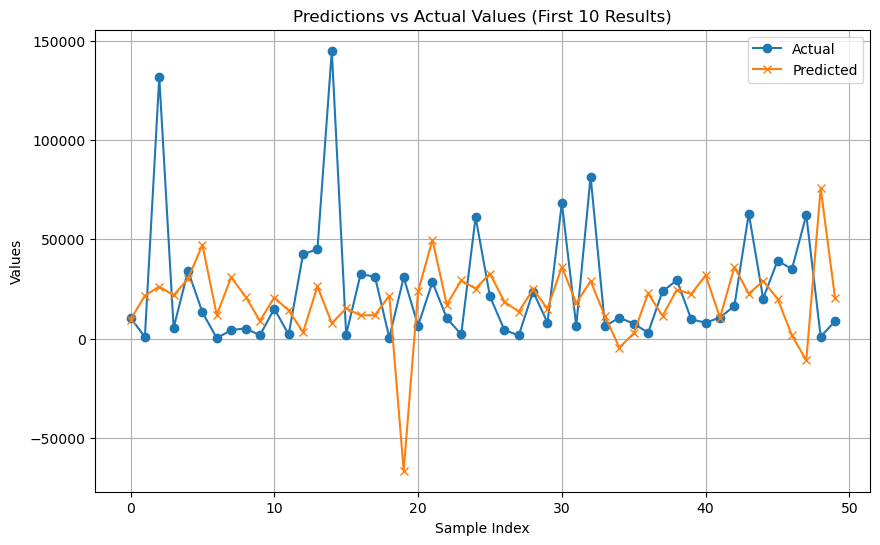

In [282]:
# polynomial Regression

from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

linear_model = LinearRegression()

polynomial_3 = PolynomialFeatures(degree=4)

X_poly = polynomial_3.fit_transform(X_train)

X_poly_test = polynomial_3.fit_transform(X_test)

linear_model.fit(X_poly,y_train)

y_pred = linear_model.predict(X_poly_test)

y_test_first_ten = y_test[100:150]
predictions_first_ten = y_pred[100:150]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


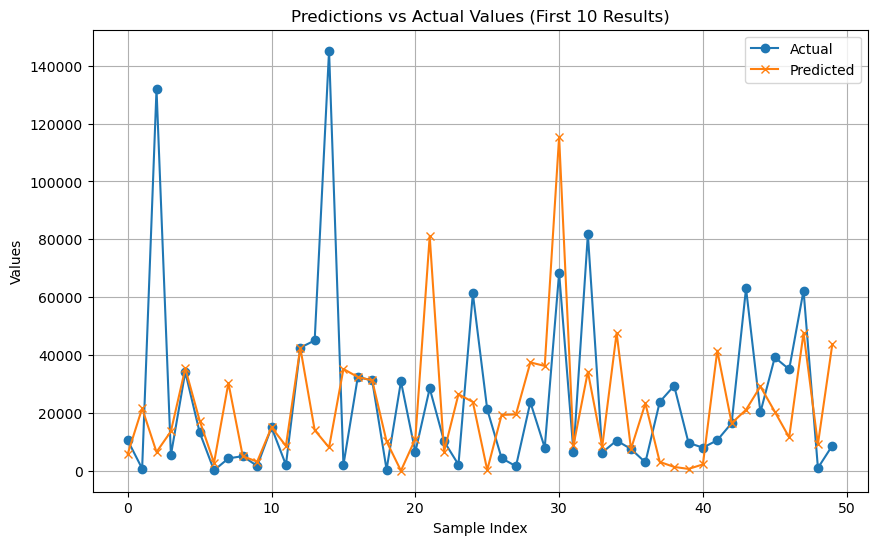

In [276]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

y_test_first_ten = y_test[100:150]
predictions_first_ten = y_pred[100:150]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

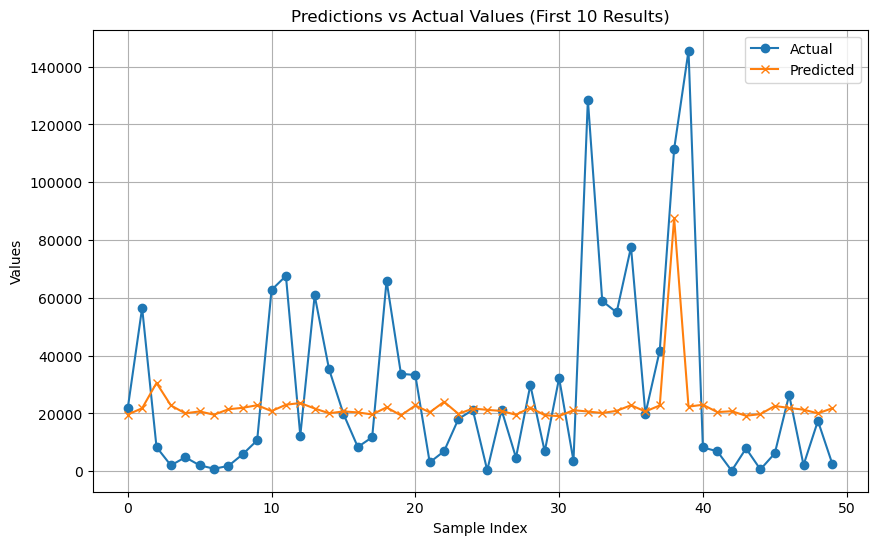

In [254]:
# Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(max_depth=3, random_state=0)

random_forest.fit(X_train,y_train)

y_pred = random_forest.predict(X_test)

y_test_first_ten = y_test[:50]
predictions_first_ten = y_pred[:50]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

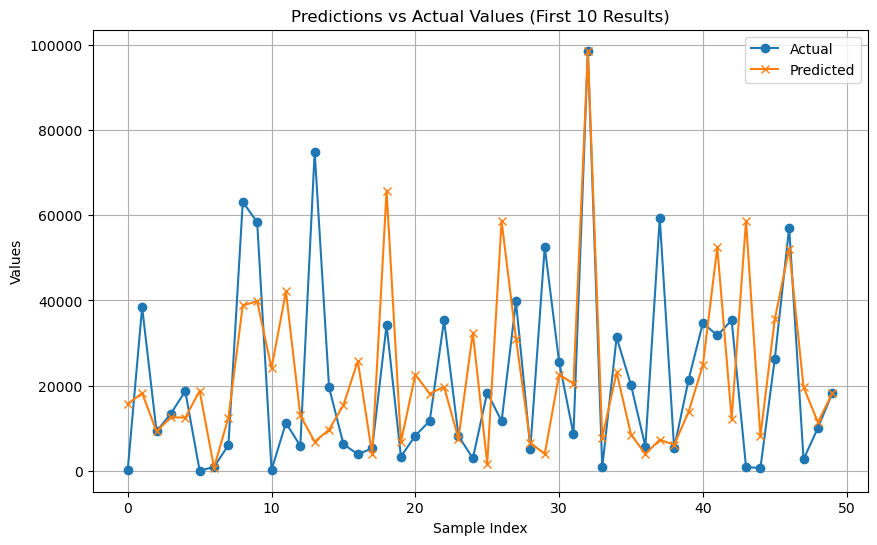

In [279]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)

neigh.fit(X_train,y_train)

y_pred = neigh.predict(X_test)


y_test_first_ten = y_test[50:100]
predictions_first_ten = y_pred[50:100]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

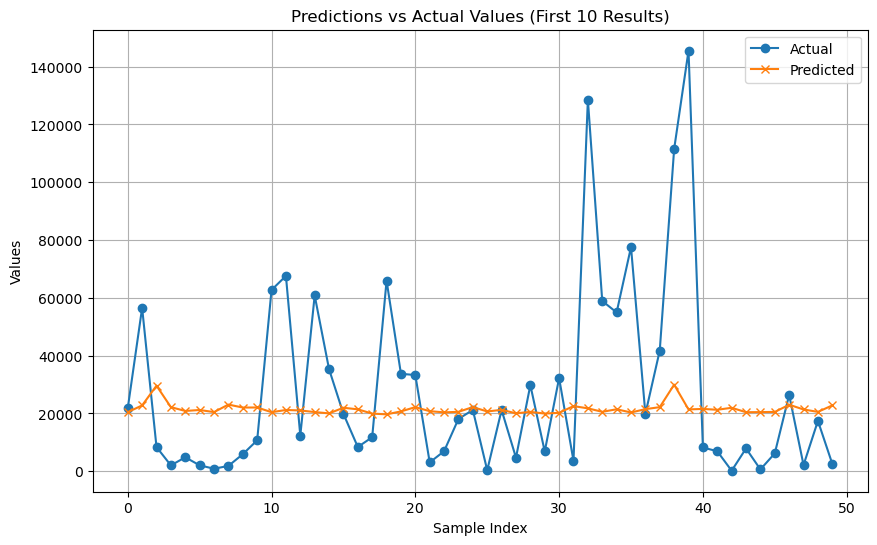

In [256]:
# Ridge Regression

from sklearn.linear_model import Ridge

rdg = Ridge(alpha=0.5)

rdg.fit(X_train,y_train)

y_pred = rdg.predict(X_test)

y_test_first_ten = y_test[:50]
predictions_first_ten = y_pred[:50]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

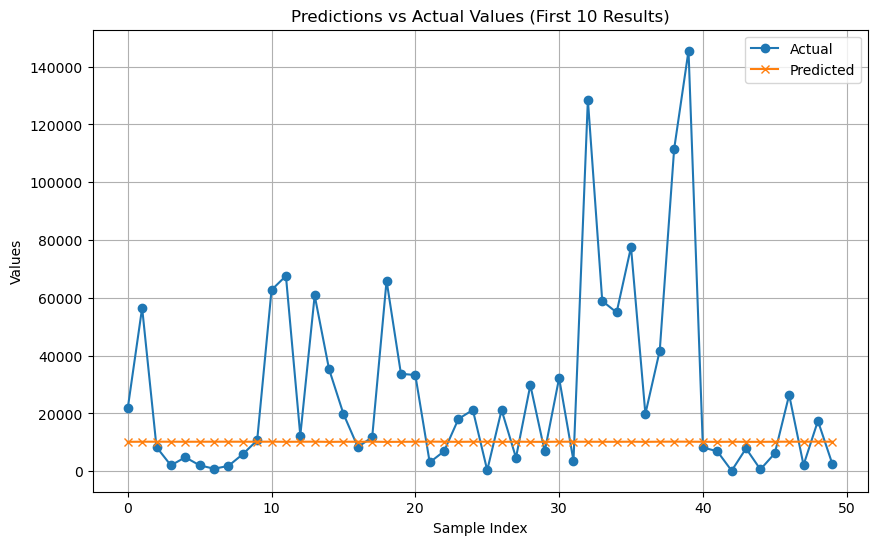

In [257]:
# SVR model

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

y_test_first_ten = y_test[:50]
predictions_first_ten = y_pred[:50]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

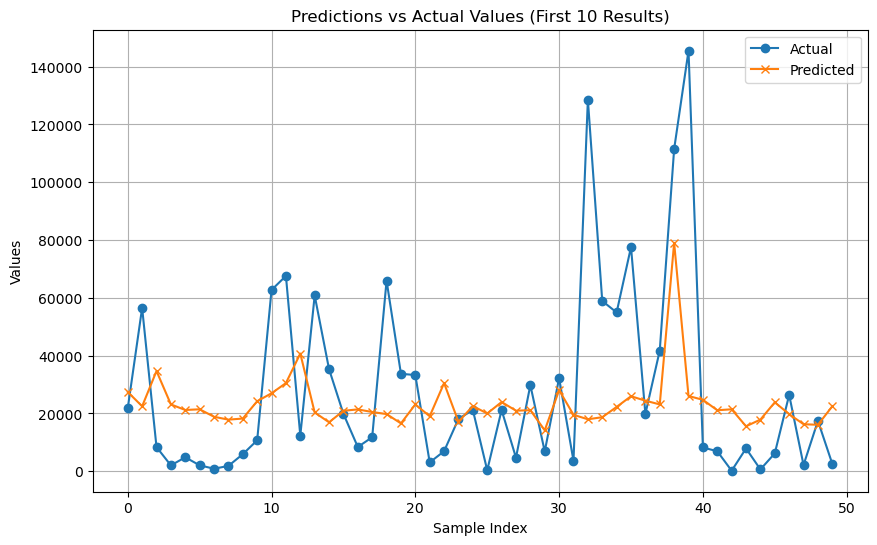

In [258]:
# Gradient Boosting Rgeression

from sklearn.ensemble import GradientBoostingRegressor

gbc = GradientBoostingRegressor(n_estimators=300,
                                 learning_rate= 0.05,
                                 random_state= 100,
                                 max_features=5)

gbc.fit(X_train,y_train)

y_pred = gbc.predict(X_test)

y_test_first_ten = y_test[:50]
predictions_first_ten = y_pred[:50]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(50), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(50), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()